In [122]:
#Importing all neccessary libraries
import time
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
import math
import sys
import unittest

## **Introduction**

This report will examine the amount of resources necessary to execute a variety of algorithms. When an algorithm is executed a number of different resources are used up in order to allow for this process to occur, for example time, storage, memory etc. It will be our task to focus in particular on the exection runtime of the algorithm. The algorithm that will be investigated is that which computes the factorial of a positive integer n. Following on from this the run time of two search algorithms, namely linear search and binary search will also be examined and their execution times investigated. Through this investigation we will be able to determine and discuss the time comlpexities of these algorithms and how they behave with increasing input. In each section I will state the task at the beginning and the consequent sub-sections will consist of both executable programs and markdown cells explaining the results and concepts. All plots will be attached seperately for viewing. The appendix at the end of this report will contain all the unit tests of the preceding algorithms which have been implemented. 

## **1. Write an algorithm to compute the factorial of a positive integer n**

The factorial of a positive integer n is described as the product of all values form n to 1. An example being the factorial of 5 which is $5 \times 4 \times 3 \times 2 \times 1=120$. In order to compute the factorial of a positive integer the following algorithm would need to be implemented:

**step 1**: input positive integer number n \
**step 2**: if n is less than 0 then output an error and stop the calculation \
**step 3**: otherwise, initialize the result to 1 \
**step 4**: for i iterating over 2 to n+1 with an incrememnt of 1, the result will be itself multiplied by i \
**step 5**: Once the loop is complete, return the result 


## **2. For different values of n, implement your algorithm using two approaches: iterative and recursive (tail and non-tail recursions).  For each case, plot running time as a function of n and compare the achieved result**

### 2.1 Iterative Approach

A for loop will be used to implement the factorial algorithm using an iterative method. As above in step 1, the result will be initialized to 1 and an iteration will be performed over all numbers from 2 up to and including n. The result is then returned once the iterative process is completed. 2 is used as a starting point for the loop due to the fact that the factorial of both 0 and 1 is 1, this is also why the result is initialized to 1. 

### 2.1.1 Iterative algorithm

In [2]:
def Iterative_factorial(n):
    
    #return an error message if the number inputeed is less than 0.
    if n<0:
        return "error: factorials cannot be defined for negative numbers"
    
    #initialize the result to 1
    result = 1
    
    #for loop iterating over all numbers from 2 up to n+1
    #by beginning the loop at 2 we ensure that 0 and 1 return a result of 1.
    for i in range(2, n+1): 
        
        #assign the product of result with i to the variable result 
        result *= i 
        
    #Return the final result 
    return result 

### 2.1.2 Calculating execution time 

Now that the Iterative algorithm has been implemented, we will time the execution time taken for increasing values of n. This measurement will be recorded using a python module *timeit*, which allows us to compute the execution time of segments of python code. Due to the fact that a sequence of factorials is required for tasks 3 and 4 of this assignment, for the first implementation of this algorithm we will take values of n up to and including 1000, with an increment of 1 for each iteration, this implementation will not be timed. This will provide us with a sequence of factorials that will be later used as an input for the search algorithms. Following on from this we will use an increment of 20 when calculating execution times for the implementation of the iterative algorithm and recursive algorithms, this will give us 50 execution times for increasing n. The *timeit* module has built in functionality that allows us to repeat the  execution of the given statement n times in a loop, this is signified by the **-n** seen below, for this case we will repeat each iteration 5000 times. This repetition will enable us to produce an average result which in turn increases the accuracy and reliability of our results. As well as this the **-o** below signifies that the timeit module will return a Timeit Result that can be stored in a variable to inspect. The **.average** attribute of the timeit results variable enables us to find the average execution time for each iteration, these results will be calculated in seconds.

In [3]:
#storing factorial sequence to be used later in section 3.
Iterative_factorial_sequence = list()
for i in range(0, 1000):
        Iterative_factorial_sequence.append(Iterative_factorial(i))

In [4]:
#initialize two empty lists in which the exection times and the factorial sequence can be stored. 
Iterative_factorial_times = list()

#for loop iterating over 0 to 1000 inclusive 
for i in range(0, 1000,20): 

    #Timeit Result calculated and stored in Iterative_time variable (explanation of timeit function above)
    Iterative_time = %timeit -q -o -n 5000 Iterative_factorial(i)

    #appending the factorial results to the list 

    #appending the Timeit results to the list 
    Iterative_factorial_times.append(Iterative_time) 


In [5]:
#Initialize empty list for the average execution times 
average_Iterative_factorial_times = []

#for loop iterating over the Timeit Results 
for i in range(0,50): 
    
    # .average attribute of timeit results used to create a list of the average exection times 
    average_Iterative_factorial_times.append(Iterative_factorial_times[i].average)

### 2.1.3 plotting results

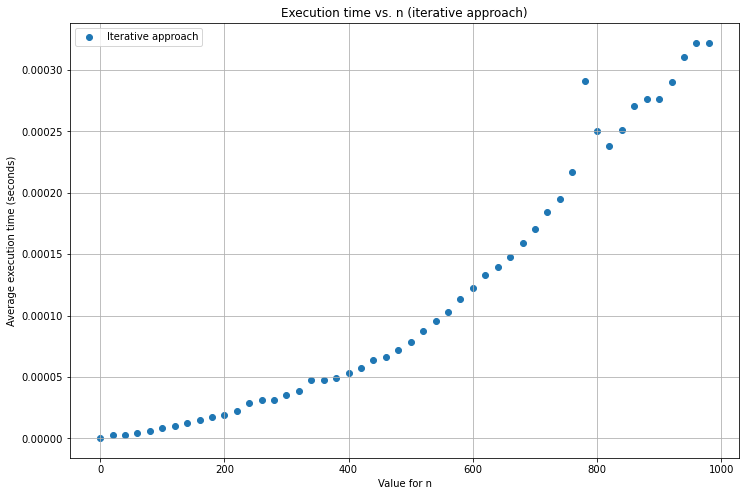

In [87]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.xlabel('Value for n') 
plt.ylabel('Average execution time (seconds)') 
plt.scatter([x for x in range(0,1000,20)], average_Iterative_factorial_times, label ='Iterative approach') 
plt.title("Execution time vs. n (iterative approach)" )
plt.grid() 
plt.legend() 
plt.savefig('1. Execution time vs. n (iterative approach).png')
plt.show()

**Results summary**:

It is evident from the above plot that the time complexity of the iterative solution is O(n). This is due fact that we observe an approximately linear plot when time is plotted as a function of n. This is further justified by the fact that within our algorithm we only have a single for loop operation, which has n multiplications within it. Therefore as n increases, the number of operations increases linearly. All other operations occuring within the algorithm are constant with respect to time and therefore have no bearing over the efficiency of the algorithm.


### 2.2 Recursive Approach

Recursion is a process by which a function calls itself either directly or indirectly. Below is the implementation of a recursive algorithm with the use of tailed recursion. Tailed recursion is when the recursive call is the last thing executed by the function itself. In the implementation below the idea is that an auxillary paramter in the form of **i** is used as a storage variable in which the the accumulated factorial value can be stored. Therefore when n reaches 0, this accumulated value is returned and is the last thing executed by the function, hence why it is called a tailed recursive approach. 

Another reason why 1000 was chosen as the maximum number of n is due to the fact that a maximum recursion depth can be exceedd which will in turn lead to a stack overflow. Stack overflow occurs when the memory is exhausted on the stack and will consequentially lead to a stack overflow error. As can be seen in the cell below the maximum recursion limit is 3000 and therefore we are well within the bounds of this limit and are well guarded from any problems related to stack overflow.



In [7]:
print(sys.getrecursionlimit())

3000



### 2.2.1 Recursive Algorithm (tail recursion)


In [50]:
#auxillary paramter initialized as 1
def tail_factorial(n, i = 1):
    #return an error message if the number inputeed is less than 0.
    if n<0:
        return "error: factorials cannot be defined for negative numbers"
    
    #when n reaches 0, return the final accumulated value i 
    if (n == 0):
        return i
    
    #decrease n by 1 for each iteration and multiply the stored value i by n 
    return tail_factorial(n - 1, n * i)

### 2.2.2 Calculating execution time 

The execution time was calculated in the exact same manner as in *section 2.1.2*. The maximum value of **n** will remain at 1000, however the incrememnt will be increased to 20. The timeit module will be used again and each loop will be repeated 5000 times and an average execution time will be calculated. 



In [9]:
#initialize an empty list in which the exection times can be stored. 
tail_factorial_times = list()

#for loop iterating over 0 to 1000 with an incrememnt of 20.
for i in range(0, 1000, 20): 
    
    #Timeit Result calculated and stored in tail_factorial_time variable
    tail_factorial_time = %timeit -q -o -n 5000 tail_factorial(i)
    
    #appending the Timeit results to the list 
    tail_factorial_times.append(tail_factorial_time) 

In [10]:
#Initialize empty list for the average execution times 
average_tail_factorial_times = []

#for loop iterating over the Timeit Results 
for i in range(0,50):
    
    # .average attribute of timeit results used to create a list of the average exection times 
    average_tail_factorial_times.append(tail_factorial_times[i].average)

### 2.2.3 plotting results

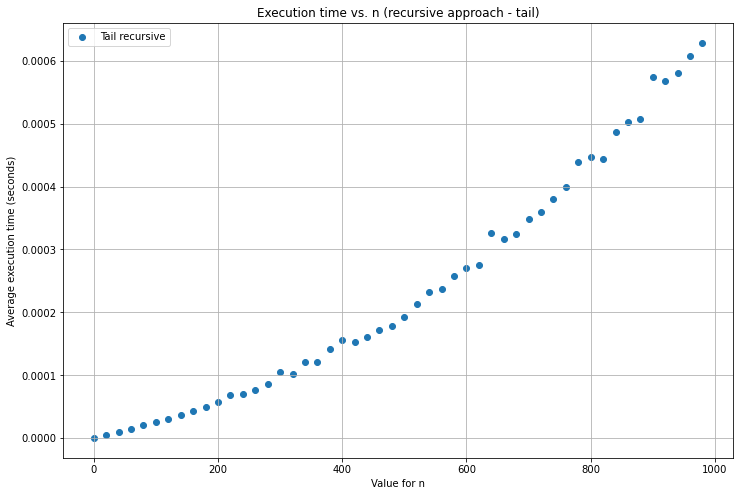

In [60]:
plt.xlabel('Value for n') 
plt.ylabel('Average execution time (seconds)') 
plt.title("Execution time vs. n (recursive approach - tail)" )
plt.scatter([x for x in range(0,1000,20)], average_tail_factorial_times, label ='Tail recursive') 
plt.grid() 
plt.legend() 
plt.savefig('2. Execution time vs. n (recursive approach - tail).png')
plt.show() 

**Results summary**:

Once again we observe an approximately linear plot when time is plotted as a function of n. This is justified by the fact that within our recursive algorithm we would expect that the function is called n times during a normal operation. Therefore this function has big-O notation of O(n).

### 2.2.4 Recursive Algorithm (Non-tail recursion)

The final algorithm to be implemented is the non-tail recursive approach. This approach appears similar to the tail recursive approach, however it must be noted that there is no auxillary parameter used to form the final result. Instead we can see that the value returned by fact(n-1) is used in fact(n), and therefore the call to fact(n-1) is not the last thing done by fact(n). This essentially means that there will be outstanding operations after the recursive call has occured. Below is the implementation of the non-tail recursive algorithm. Execution times will be calculated as in previous approaches and plots will be produced and displayed within the same ranges as the tail recursive approach.


In [52]:
def Non_tail_factorial(n): 
    #return an error message if the number inputeed is less than 0.
    if n<0:
        return "error: factorials cannot be defined for negative numbers" 

    #if n is equal to 0, return a value of 1
    if n == 0: 
        return 1   
    
    #perform recursion, multiplying n by n-1 for each iteration and returining this value to the function
    return n * Non_tail_factorial(n-1) 

### 2.2.5 Calculating execution time 

Once again the the execution time was calculated in the exact same manner as in previous sections. The maximum value of **n** will remain at 1000, with an increment of 20. The timeit module will be used again and each loop will be repeated 5000 times and an average calculated. 


In [13]:
#initialize an empty list in which the exection times can be stored. 
Non_tail_factorial_times = list()

#for loop iterating over 0 to 1000 with an incrememnt of 20.
for i in range(0, 1000, 20): 

    
    #Timeit Result calculated and stored in Non_tail_factorial_time variable
    Non_tail_factorial_time = %timeit -q -o -n 5000 Non_tail_factorial(i)
    
    #appending the Timeit results to the list 
    Non_tail_factorial_times.append(Non_tail_factorial_time) 

In [14]:
#Initialize empty list for the average execution times 
average_Non_tail_factorial_times = []

#for loop iterating over the Timeit Results 
for i in range(0,50):
    
    # .average attribute of timeit results used to create a list of the average exection times 
    average_Non_tail_factorial_times.append(Non_tail_factorial_times[i].average)
    

### 2.2.6 plotting results

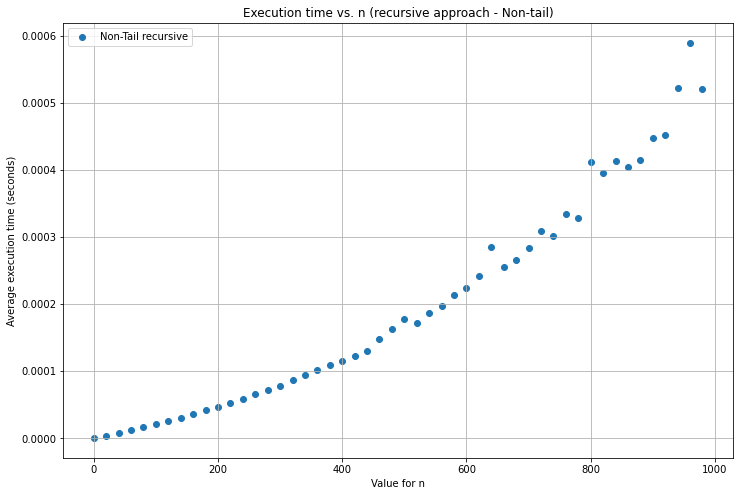

In [61]:
plt.xlabel('Value for n') 
plt.ylabel('Average execution time (seconds)') 
plt.title("Execution time vs. n (recursive approach - Non-tail)" )
plt.scatter([x for x in range(0,1000,20)], average_Non_tail_factorial_times, label ='Non-Tail recursive') 
plt.grid() 
plt.legend() 
plt.savefig('3. Execution time vs. n (recursive approach - Non-tail).png')
plt.show() 

**Results summary**:

Once again we observe an approximately linear plot when time is plotted as a function of n. This is very similar to the tail recursion, the function calls itself one time in each iteration, so it's O(n) as well.

### 2.3 Execution time comparison.

Below we can see a plot of the three different approaches and how they differ only slightly. All three approaches have the same time complexity of O(n) and therefore display an approximately linear equation when plotted. While each approach was repeated a number of times for each increasing value of n in order to calculate an average, it appears that still some anomalies remain as we can see some outliers in the execution times in all three approaches. It would not be expected that the plots would be perfectly linear, but rather approximately linear. It is evident from the plot that the tail recursive approach produces a line which has the largest slope of the three, followed by the non-tail recursive approach and then the iterative recursion. This indicates that as n increases, the tail recursive approaches execution time increases at the fastest rate. Therefore we can deduce that the iterative approach is faster in execution than the recursive approach, this is expected due to the fact that recursion requres the allocation of a new stack frame for each call of the function. The tail recursive approach is the slowest of the three, this is as expected due to the fact that the python compiler does not handle optimization for tail recursive calls and therefore in cases like this the tail recursive function uses more system resources than the equivalent non-tail recursive and iterative solutions.

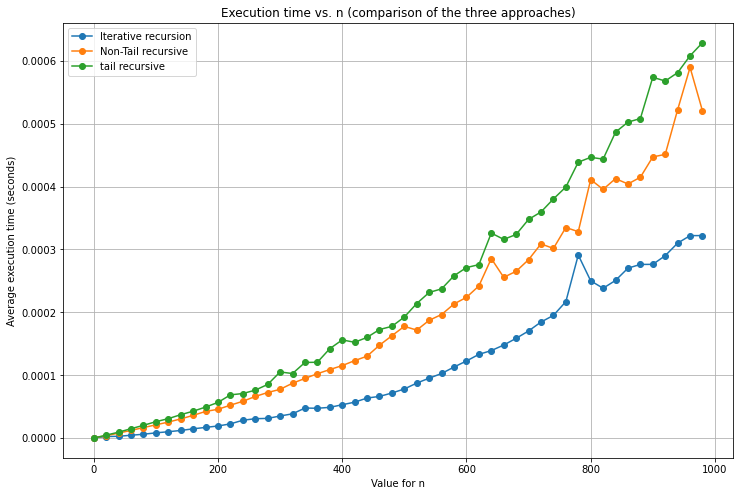

In [88]:
x = [x for x in range(0,1000,20)]
plt.title("Execution time vs. n (comparison of the three approaches)" )
plt.xlabel('Value for n') 
plt.ylabel('Average execution time (seconds)') 
plt.plot(x, average_Iterative_factorial_times,'-o', label ='Iterative recursion') 
plt.plot(x, average_Non_tail_factorial_times,'-o', label ='Non-Tail recursive')  
plt.plot(x, average_tail_factorial_times,'-o', label ='tail recursive') 
plt.grid() 
plt.legend()
plt.savefig("4. Execution time vs. n (comparison of the three approaches).png")
plt.show()

## **3. Use one of the sequences obtained from task 2 as an input for search algorithms. Implement with two methods from:  linear search, iterative binary and recursive binary**

Using the sequence we obtained from the implementation of the iterative algorithm we can now perform a algorithmic search on this sequence using two methods, these being: linear search and iterative binary search. These two methods will be discussed in more detail below.


### 3.1 Linear Search implementation

Linear search is one of the simplest approaches out of the many search algorithms we have at our disposal. It simply takes a sequence of elements and starts from the leftmost element of the sequence, it then steps through the sequence one by one checking each element against the element for which we are searching. If the element is found then the index of this element is returned, if not then the search function will return -1 indicating that it has been unsuccessful. If we look at the example implementation of this algorithm below we can see that it is working as expected, the element 120 is searched for in the factorial sequence and it's index in the array 5 is returned. In contrast when we search for 0 in the array the function returns a value of -1 due to the fact that 0 is not present in the factorial sequence. The time complexities of this search algorithm will be discussed in section 4 of this report. 

In [53]:
def linear_search(sequence, element): 
    
    #iterate over the length of the sequence
    for i in range(len(sequence)): 
          
        #if the element at i is equal to the element being searched return i (the index of this element)
        if sequence[i] == element: 
            return i 
      
    #If the element is not found, return -1
    return -1

In [18]:
#simple example
print("index of 120 is at", linear_search(Iterative_factorial_sequence, 120))
print("index of 0 is at", linear_search(Iterative_factorial_sequence, 0))

index of 120 is at 5
index of 0 is at -1


### 3.2 Binary Search Implementation (Iterative)

Binary search is a more sophisticated search algorithm, we will implement the iterative approach. With this approach the element being searched for is checked against the middle element of the sequence, if the values are the same then the index of the middle element is returned. If the element being searched for is greater than the middle element then it must lie in the upper half of the sequence, and vice versa if the element being searched for is smaller than the middle element. This process is carried out repeatedly until the element is found or not. By doing this, half of the array can be discarded after each iteration. Binary search will therefore take less time to search for an element in a sequence when compared to linear search as it does not scan through each element of the list, but rather performs a search of half of the list. It must be noted that it is assumed that the array being searched is sorted before this search algorithm is implemented, as this is crucial to its success. The time complexities of this search algorithm will be discussed in section 4 of this report. As with the linear search algorithm, this algorithm will return the index of the element being searched, and if the element is not present then -1 will be returned as shown in the simple example driver code below.

In [54]:
def binary_Search(sequence, element): 
    
    #initialize the start and middle to 0, and the end to the length of the sequence minus 1
    start = 0  
    end = len(sequence) - 1  
    middle = 0  
  
    #while loop conditional on the start being less than or equal to the end 
    while start <= end: 
      
        #calculating the middle point of the array
        middle =  start + (end - start) // 2
          
        # if the element is equal to the middle element of the array then return the middle element index.
        if sequence[middle] == element: 
            return middle 
  
        # if the element is greater than the middle element of the array then reassign start with a new value.
        elif sequence[middle] < element: 
            start = middle + 1
            
        # if the element is less than the middle element of the array then reassign start with a new value.
        else: 
            end = middle - 1
      
    #If the element is not found, return -1
    return -1

In [20]:
#simple example
slice = Iterative_factorial_sequence[0:10]
print("sequence:", slice)

print("index of 720 is at", binary_Search(slice, 720))
print("index of 0 is at",binary_Search(slice,0))

sequence: [1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]
index of 720 is at 6
index of 0 is at -1


## **4. For each approach, compute the best and worst running times. Give some examples by plotting the running time as a function of n.**

Best and worst cases of an algorithm can be defined in terms of running time, memory or other various resources. For the purposes of this assignment we will be computing the best and worst cases with respect to the running time of the algorithm i.e time complexity. The best case occurs when the minimum number of steps of an algorithm are performed in order to return a result. The worst case occurs when the maximum number of steps of an algorithm are performed in order to return a result. We can therefore plot these scenarios for increasing array size against the execution time of the program. 

### 4.1 Linear Search Best and Worst running times. 

The best case time for linear search occurs when the element being searched is the first element of the array. This is due to the fact that the linear search algorithm performs its search sequentially, and therefore if the target element is the first in the array, the algorithm has to perform the least amount of steps possible. On the other hand, the worst case time for linear search occurs when the element being searched for is the last element of the array. In this case the algorithm must perform the maximum number of iterations before it can find the target element.

### 4.1.1 Calculating the running times

The running times of the best and worse cases will be computed in a very similar fashion to section 2 of this report. Using the sequence of factorials obtained in section 2 we can compute the running time of the best and worst cases of the linear search algorithm  for increasing sequence size. The sequence length will begin at 10 and then increase by 10 elements for each iteration until it reaches the maximum length of 1000. The timeit module will once again be used to measure the execution time of the algorithm, each loop will be repeated 10,000 times and the average calculated as in previous sections. For the worst case the final element of the array will be searched for, for the best case the first element of the array will be searched for.


In [21]:
#create two empty lists in which the best and worst times can be stored.
Worst_Linear_search_times = list()
Best_Linear_search_times = list()

#for loop iterating over 10 to 1010 with a 10 step increment
for i in range(10, 1010, 10):
    
    #creating an increasing segment of the factorial sequence for each iteration
    sliced_sequence = Iterative_factorial_sequence[0:i]

    #Timeit Results calculated and stored in variables
    Worst_Linear_time = %timeit -q -o -n 10000 linear_search(sliced_sequence, sliced_sequence[-1])
    Best_Linear_time = %timeit -q -o -n 10000 linear_search(sliced_sequence, 1)
    
    #appending the Timeit results to the lists    
    Worst_Linear_search_times.append(Worst_Linear_time) 
    Best_Linear_search_times.append(Best_Linear_time) 

In [22]:
#create two empty arrays in which the best and worst average time s can be stored.
average_worst_linear_search_times = []
average_best_linear_search_times = []

#for loop iterating over the Timeit Results 
for i in range(0,100):
    
    # .average attribute of timeit results used to create a list of the average exection times     
    average_worst_linear_search_times.append(Worst_Linear_search_times[i].average)
    average_best_linear_search_times.append(Best_Linear_search_times[i].average)  

### 4.1.2 Plotting the results

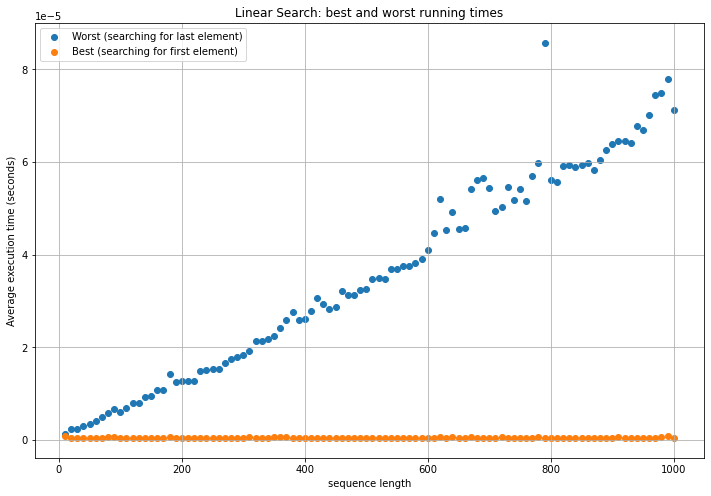

In [63]:
plt.title("Linear Search: best and worst running times" )
plt.xlabel('sequence length') 
plt.ylabel('Average execution time (seconds)') 
plt.scatter([x for x in range(10, 1010, 10)], average_worst_linear_search_times, label ='Worst (searching for last element)') 
plt.scatter([x for x in range(10, 1010, 10)], average_best_linear_search_times, label ='Best (searching for first element)') 
plt.grid() 
plt.legend() 
plt.savefig("5 Linear Search: best and worst running times.png")
plt.show() 

**Results Summary:**

It is immmediately evident from the above blot that the worst case running times are linear in behaviour. As the number of elements in the array increases, the time complexity of the function also increases, meaning this function has time complexity O(n). The best case running times on the other hand are constant regardless of the size of the array and therefore have time complexity O(1), this is as expected. These plots will be discussed further in section 5 when the curve-fitting algorithm has been implemented.

### 4.2 Binary Search Best and Worst running times. 

The best case running time for binary search occurs when the element being searched for is the middle element of the array. This is due to the fact that the binary search algorithm checks the element being searched for against the middle element of the sequence and desired result will be returned after one iteration of the function. The worst case running time for binary search occurs when the element is not present in the sequence at all, in this case the algorithm must search through the entire sequence with no successful result.

### 4.2.1 Calculating the running times

In [24]:
#create two empty lists in which the best and worst times can be stored.
Worst_Binary_search_times = list()
Best_Binary_search_times = list()

#for loop iterating over 10 to 1010 with a 10 step increment
for i in range(10, 1010, 10):
    #creating an increasing segment of the factorial sequence for each iteration
    sliced_sequence = Iterative_factorial_sequence[0:i]

    #Timeit Results calculated and stored in variables
    Worst_time = %timeit -q -o -n 10000 binary_Search(sliced_sequence, 0)
    Best_time = %timeit -q -o -n 10000 binary_Search(sliced_sequence, sliced_sequence[(len(sliced_sequence)//2)-1])

    #appending the Timeit results to the lists 
    Worst_Binary_search_times.append(Worst_time) 
    Best_Binary_search_times.append(Best_time) 


In [25]:
#create two empty arrays in which the best and worst average time s can be stored.
average_worst_binary_search_times = []
average_best_binary_search_times = []

#for loop iterating over the Timeit Results 
for i in range(0,100):
    average_worst_binary_search_times.append(Worst_Binary_search_times[i].average)
    average_best_binary_search_times.append(Best_Binary_search_times[i].average)

### 4.2.2 Plotting the results

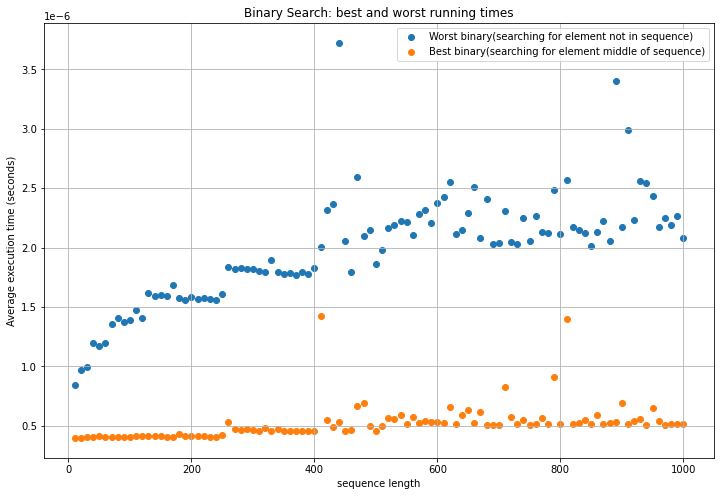

In [64]:
plt.xlabel('sequence length') 
plt.ylabel('Average execution time (seconds)') 
plt.title("Binary Search: best and worst running times" )
plt.scatter([x for x in range(10, 1010, 10)], average_worst_binary_search_times, label ='Worst binary(searching for element not in sequence)') 
plt.scatter([x for x in range(10, 1010, 10)], average_best_binary_search_times, label ='Best binary(searching for element middle of sequence)') 
plt.grid() 
plt.legend() 
plt.savefig("6. Binary Search: best and worst running times.png")
plt.show() 

**Results Summary:**

From ananlysis of the scatter plots above we can see that the worst case running times are logarithmic in behaviour,  O(logn) to be more precise, this will be further analyzed in section 5 when the curves are fitted. As the array size increases, the worst case running times seems to quickly increase and then almost plateau and level out. Once again, the best case running times are constant regardless of array size and therefore have time complexity of O(1), this is as expected. These plots will be discussed further in section 5 when the curve-fitting algorithm has been implemented.

### 4.3 Comparing results

It is evident from the plots below that the binary search algorithm allows for significantly faster searching of an array when compared to linear search. It must be noted that the plots axis have varying scales dependant on the range of running times, it is for that reason that the worst case binary search results below look almost constant, they are in fact still logarithmic. However in comparison to the linear serach times this just shows how much faster the binary search algorithmm is even in its worst case running times. The best case running times below show that they are both approximately constant. There are a few outliers present in both comparison plots, but this is as expected and they can be ignored for the purposes of analysis.

### 4.3.1 Worst Running Times comparison 

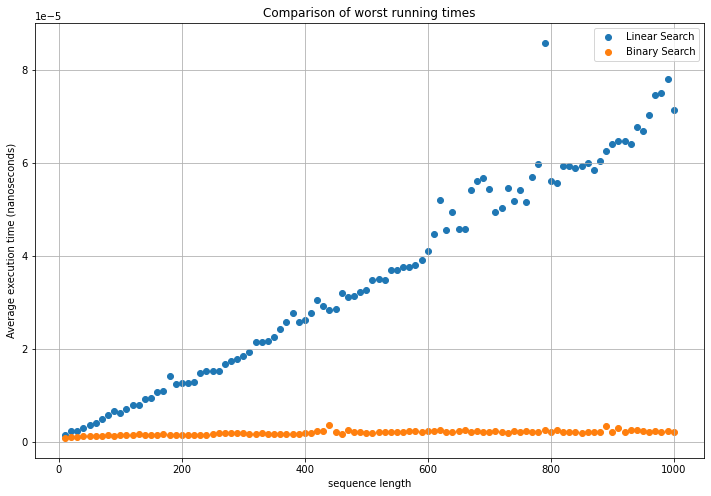

In [65]:
plt.xlabel('sequence length') 
plt.ylabel('Average execution time (nanoseconds)') 
plt.title("Comparison of worst running times" )
plt.scatter([x for x in range(10, 1010, 10)], average_worst_linear_search_times, label ='Linear Search') 
plt.scatter([x for x in range(10, 1010, 10)], average_worst_binary_search_times, label ='Binary Search') 
plt.grid() 
plt.legend() 
plt.savefig("7. Comparison of worst running times.png")
plt.show() 

### 4.3.2 Best Running Times comparison 

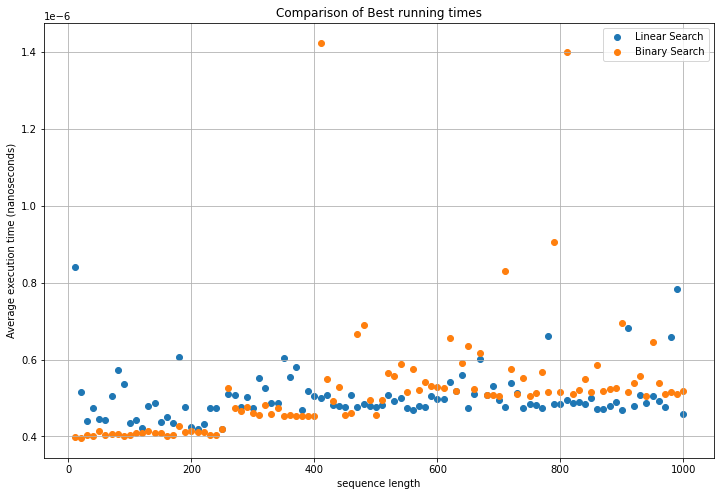

In [66]:
plt.xlabel('sequence length') 
plt.ylabel('Average execution time (nanoseconds)') 
plt.title("Comparison of Best running times" )
plt.scatter([x for x in range(10, 1010, 10)], average_best_linear_search_times, label ='Linear Search') 
plt.scatter([x for x in range(10, 1010, 10)], average_best_binary_search_times, label ='Binary Search') 
plt.grid() 
plt.legend() 
plt.savefig("8. Comparison of Best running times.png")
plt.show() 

## **5. Use curve-fitting algorithms to find the equation of the running times obtained from Tasks 2-4.**

### 5.1 Factorial algorithms

### 5.1.1 Iterative Approach - Fitted Curve

As discussed in section 2, when running time is plotted as a function of n for the iterative approach to the factorial algorithm, an approximately linear plot is produced. Due to the fact that we have n multiplications in the for loop, a loose bound is time complexity of O(n). We will therefore fit a linear curve to this plot as shown below. The python library scipy curve fitting will be used for the remainder of this section in order to predict the lines of best fit for these functions. This library allows us to input the general equation of the function and then uses a predictive model to calculate the paramters that result in the best fitting line. The scatter plot points represent the original average execution time results, while the staright line represents the line of best fit. The equation of this line is of the form: $f(x) = ax + b$ with parameters $a = 3.44e-07$ and $b = -5.29e-05$

In [89]:
def Iterative_Factorial_Fitted_Curve(x,a,b):
    return np.array(x)*a + b
x = [int(x) for x in range(0, 1000, 20)]
y = average_Iterative_factorial_times
iterative_parameters, param_cov= optimize.curve_fit(Iterative_Factorial_Fitted_Curve, x,y)
print(iterative_parameters[0])
print(iterative_parameters[1])

3.441410696937973e-07
-5.2895695086300564e-05


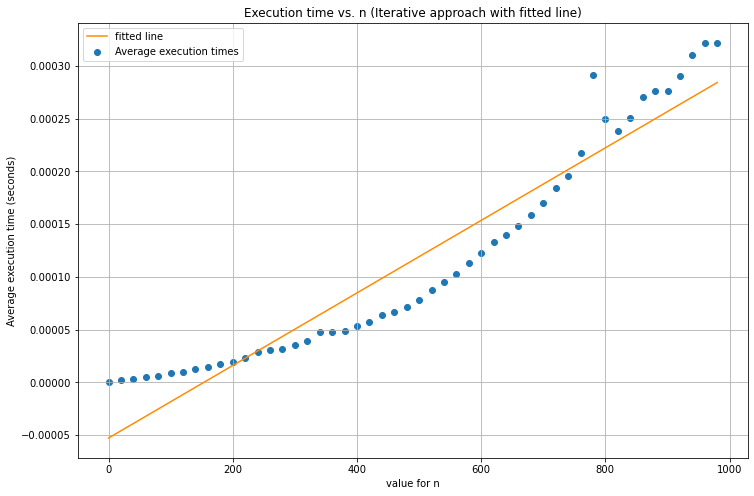

In [90]:
plt.xlabel('value for n') 
plt.ylabel('Average execution time (seconds)') 
plt.title("Execution time vs. n (Iterative approach with fitted line)" )
plt.scatter(x, y, label='Average execution times')
plt.plot(x, Iterative_Factorial_Fitted_Curve(x, iterative_parameters[0], iterative_parameters[1]), label = 'fitted line', color = 'darkorange')
plt.legend(loc='upper left')
plt.grid() 
plt.savefig("9. Iterative approach with fitted line.png")
plt.show()

### 5.1.2 Recursive (tail) Approach - Fitted Curve

Similar to the iterative approach, this algorithm has time complexity O(n). The equation of this line is of the form: $f(x) = ax + b$ with parameters $a = 6.36e-07$ and $b = -7.32e-05$ . 

In [91]:
def Recursive_tail_Factorial_Fitted_Curve(x,a,b):
    return np.array(x)*a + b
x = [int(x) for x in range(0, 1000, 20)]
y = average_tail_factorial_times
tail_parameters, param_cov= optimize.curve_fit(Recursive_tail_Factorial_Fitted_Curve, x,y)
print(tail_parameters[0])
print(tail_parameters[1])

6.361172433944101e-07
-7.317124091141074e-05


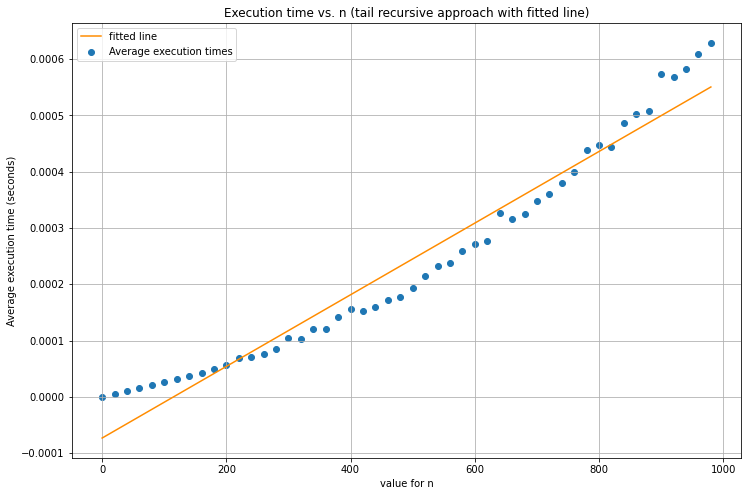

In [92]:
plt.xlabel('value for n') 
plt.ylabel('Average execution time (seconds)') 
plt.title("Execution time vs. n (tail recursive approach with fitted line)" )
plt.scatter(x, y, label='Average execution times')
plt.plot(x, Recursive_tail_Factorial_Fitted_Curve(x, tail_parameters[0], tail_parameters[1]), label = 'fitted line', color = 'darkorange')
plt.legend(loc='upper left')
plt.grid() 
plt.savefig("10. tail recursive approach with fitted line.png")
plt.show()

### 5.1.3 Recursive (non-tail) Approach - Fitted Curve

Once again this algorithm has time complexity of O(n). The equation of this line is of the form: $f(x) = ax + b$ with parameters $a = 5.39e-07$ and $b = -6.46e-05$

In [93]:
def Recursive_nontail_Factorial_Fitted_Curve(x,a,b):
    return np.array(x)*a + b
x = [int(x) for x in range(0, 1000, 20)]
y = average_Non_tail_factorial_times
no_tail_parameters, param_cov= optimize.curve_fit(Recursive_nontail_Factorial_Fitted_Curve, x,y)
print(no_tail_parameters[0])
print(no_tail_parameters[1])

5.39599889179566e-07
-6.459380340292983e-05


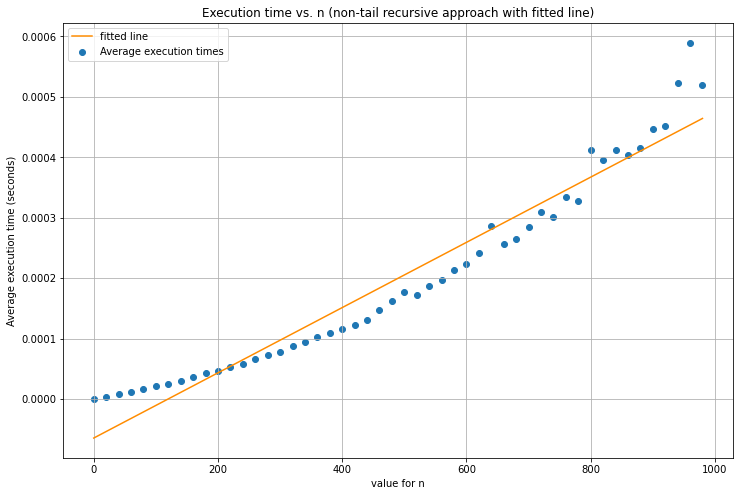

In [94]:
plt.xlabel('value for n') 
plt.ylabel('Average execution time (seconds)') 
plt.title("Execution time vs. n (non-tail recursive approach with fitted line)" )
plt.scatter(x, y, label='Average execution times')
plt.plot(x, Recursive_nontail_Factorial_Fitted_Curve(x, no_tail_parameters[0], no_tail_parameters[1]), label = 'fitted line', color = 'darkorange')
plt.legend(loc='upper left')
plt.grid() 
plt.savefig("11. non-tail recursive approach with fitted line.png")
plt.show()

### 5.1.4 Comparison plot of lines of best fit

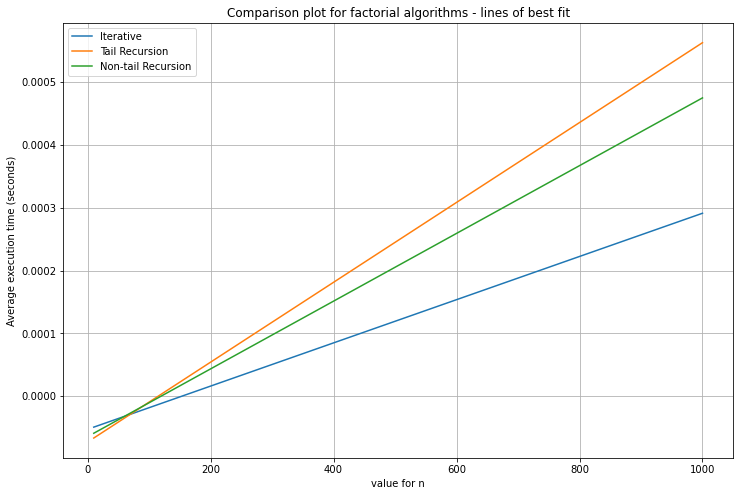

In [82]:
plt.xlabel('value for n') 
plt.ylabel('Average execution time (seconds)') 
plt.title("Comparison plot for factorial algorithms - lines of best fit" )
plt.plot(x, Iterative_Factorial_Fitted_Curve(x, iterative_parameters[0], iterative_parameters[1]), label = 'Iterative')
plt.plot(x, Recursive_tail_Factorial_Fitted_Curve(x, tail_parameters[0], tail_parameters[1]), label = 'Tail Recursion')
plt.plot(x, Recursive_nontail_Factorial_Fitted_Curve(x, no_tail_parameters[0], no_tail_parameters[1]), label = 'Non-tail Recursion')
plt.legend(loc='upper left')
plt.grid() 
plt.savefig("12. Comparison plot for factorial algorithms - lines of best fit.png")
plt.show()

As Discussed in section two, we can see that the fastest of the three algorithms is the iterative approach. While both tail and non tail appear to have slower execution times, with tail recursion being marginally slower than non-tail. See section 2 for explanations regarding these results.

### 5.2 Search Algorithms - fitted curves



### 5.2.1 Linear Search (Worst case) 

In section 4 we discussed how the equation of the linear search (worst case) function was evidently linear, for that reason we will use a linear equation to predict the fitting function.  The equation of this line is of the form: $f(x) = ax + b$ with parameters $a = 7.48e-08$ and $b = -1.98e-06$ .

In [95]:
def Linear_WorstCase_Fitted_Curve(x,a,b):
    return np.array(x)*a + b
x = [int(x) for x in range(10, 1010, 10)]
y = average_worst_linear_search_times
parameters, param_cov= optimize.curve_fit(Linear_WorstCase_Fitted_Curve, x,y)
print(parameters[0])
print(parameters[1])

7.479697905398875e-08
-1.9752154685468635e-06


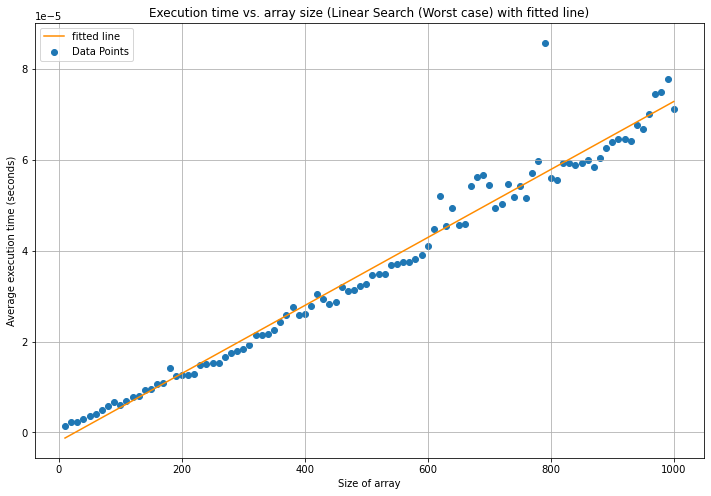

In [96]:
plt.xlabel('Size of array') 
plt.ylabel('Average execution time (seconds)') 
plt.title("Execution time vs. array size (Linear Search (Worst case) with fitted line)" )
plt.scatter(x, y, label='Data Points')
plt.plot(x, Linear_WorstCase_Fitted_Curve(x, parameters[0], parameters[1]), label = 'fitted line', color = 'darkorange')
plt.legend(loc='upper left')
plt.grid() 
plt.savefig("13. Linear Search (Worst case) with fitted line.png")

plt.show()

**Results Summary:**

The worst case in linear search algorithm takes O(n) operations. As array size increases, the algorithm must continue to search through each element regardless and therefore the equation of the line is linear in nature.

### 5.2.2 Linear Search (Best case) 

The equation of this line is of the form: $f(x) = ax + b$ with parameters $a = 3.5e-11$ and $b = 4.85e-07$

In [97]:
def Linear_BestCase_Fitted_Curve(x,a,b):
    return np.array(x)*a + b
x = [int(x) for x in range(10, 1010, 10)]
y = average_best_linear_search_times
parameters, param_cov= optimize.curve_fit(Linear_BestCase_Fitted_Curve, x,y)
print(parameters[0])
print(parameters[1])

3.5013041007158364e-11
4.8513692515117e-07


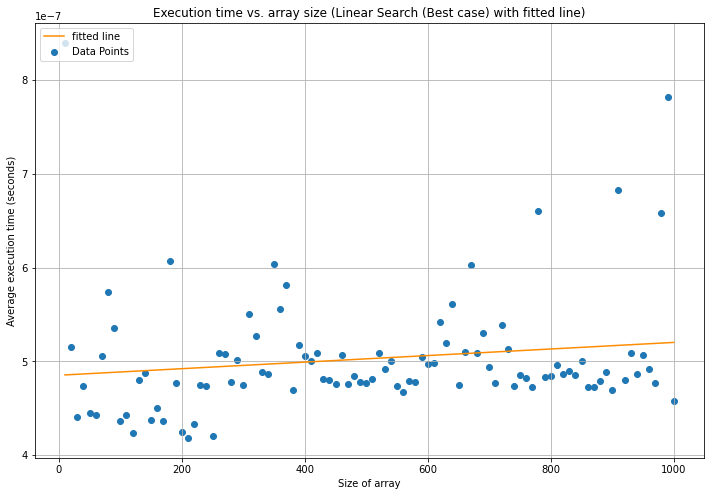

In [98]:
plt.xlabel('Size of array') 
plt.ylabel('Average execution time (seconds)') 
plt.title("Execution time vs. array size (Linear Search (Best case) with fitted line)" )
plt.scatter(x, y, label='Data Points')
plt.plot(x, Linear_BestCase_Fitted_Curve(x, parameters[0], parameters[1]), label = 'fitted line', color = 'darkorange')
plt.legend(loc='upper left')
plt.grid()
plt.savefig("14. Linear Search (Best case) with fitted line.png")

plt.show()

**Results Summary:**

The Best case in linear search algorithm takes O(1) operations. we can see from the plot that a number of anomalies are present. However the margin of difference is minimal and the plot remains approximately constant. Perhaps in order to further investigate, a larger number of arrays could be implemented.

### 5.2.3 Binary Search (Worst case) 

As discussed in section 4, the binary search algorithm will half the array size after each iteration of the loop. Therefore after k iterations the length of the array is $\dfrac{n}{2^k}$. And after k divisions, the length of the array becomes 1. Therefore:

$\dfrac{n}{2^k} = 1$ \
$n = 2^k$ \
$log_2 (n) = log_2 (2^k)$ \
$log_2 (n) = klog_2 (2)$ \
$ k = log_2 (n)$ 

Hence the time complexity of binary search is $log_2 (n)$ 

The equation of this line is of the form: $f(x) = \theta(lnx) + c $ with parameter $\theta = 3.96e-07$ and $c = -3.63e-07$ 

In [120]:
def Binary_WorstCase_Fitted_Curve(x,a,b):
    return a*np.log(x) + b
x = [x for x in range(10, 1010, 10)]
y = average_worst_binary_search_times
parameters, param_cov= optimize.curve_fit(Binary_WorstCase_Fitted_Curve, x ,y)
print(parameters[0])
print(parameters[1])


3.9574865257541305e-07
-3.630803305265394e-07


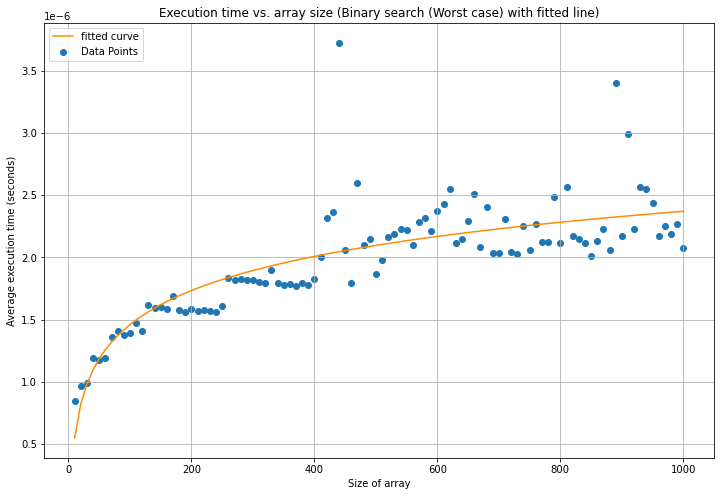

In [121]:
plt.xlabel('Size of array') 
plt.ylabel('Average execution time (seconds)') 
plt.title("Execution time vs. array size (Binary search (Worst case) with fitted line)" )
plt.scatter(x, y, label='Data Points')
Worst_Case_fitted = plt.plot(x, Binary_WorstCase_Fitted_Curve(x, parameters[0],parameters[1]), label = 'fitted curve', color = 'darkorange')
plt.legend(loc='upper left')
plt.grid() 
plt.savefig("15. Binary search (Worst case) with fitted line.png")
plt.show()


**Results Summary:**

The worst case binary search takes a logarithmic shape, as discussed in section 4 the execution time rapidly increases as the array size increases up to around length 300, and then the curve starts to plateau as it increases further. This occurs due to the fact that after each operation the size of the array is halved, and therefore increasing array size does not effect the execution time in the same manner that it effects linear search. This is what makes binary search the more superior search algorithm of the two.

### 5.2.4 Binary Search (Best case) 

The equation of this line is of the form: $f(x) = ax + b$ with parameters $a = 2.15e-10$ and $b = 4.12e-07$

In [101]:
def Binary_BestCase_Fitted_Curve(x,a,b):
    return np.array(x)*a + b
x = [x for x in range(10, 1010, 10)]
y = average_best_binary_search_times
parameters, param_cov= optimize.curve_fit(Binary_BestCase_Fitted_Curve, x,y)
print(parameters[0])
print(parameters[1])

2.1569438160265823e-10
4.1217918407164563e-07


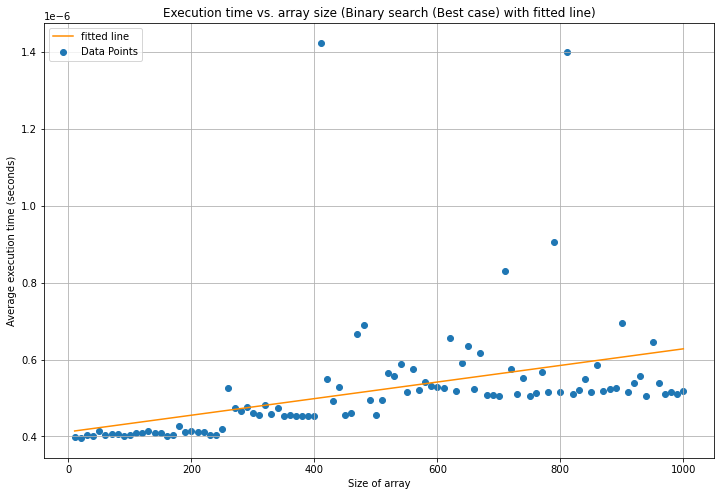

In [102]:
plt.xlabel('Size of array') 
plt.ylabel('Average execution time (seconds)') 
plt.title("Execution time vs. array size (Binary search (Best case) with fitted line)" )
plt.scatter(x, y, label='Data Points')
plt.plot(x, Binary_BestCase_Fitted_Curve(x, parameters[0],parameters[1]), label = 'fitted line', color = 'darkorange')
plt.legend(loc='upper left')
plt.grid() 
plt.savefig("16. Binary search (Best case) with fitted line.png")

plt.show()

**Results Summary:**

The Best case in binary search algorithm takes O(1) operations. In a very similar manner to the linear search best case plot, we can see that a number of anomalies are present. However the margin of difference is minimal and the plot remains approximately constant according to the fitted line.

## 6. Conclusion

In conclusion, through analysis of these algorithms, the complexities of their processes and their inner workings have become far more apparent. While this analysis could extend to thousands of more complex algorithms, it was interesting to focus on these relatively simplistic algorithms and gain a better understanding of their time complexities in terms of their execution times. Pease find attached a pdf of all relevant plots as produced at the time of analysis, and find below the unit tests carried out on the algorithms contained in this report. 

## 7. Appendix

### 7.1 Unit Tests for each of the algorithms implemented

Unit tests were performed on each of the algorithms for a range of inputs with known outsput, all tests passed successfully.

In [105]:
class TestAlgorithms(unittest.TestCase):
    #Iterative approach unit testing
    def test_Iterative_test1(self):
        self.assertEqual(Iterative_factorial(1),1)
        
    def test_Iterative_test2(self):       
        self.assertEqual(Iterative_factorial(2),2)
        
    def test_Iterative_test3(self):
        self.assertEqual(Iterative_factorial(3),6)

    def test_Iterative_test4(self):
        self.assertEqual(Iterative_factorial(5),120)
        
    def test_Iterative_test5(self):       
        self.assertEqual(Iterative_factorial(10),3628800)
        
    def test_Iterative_test6(self):
        self.assertEqual(Iterative_factorial(12),479001600)
        

    #Recursive (tail) unit testing
    def test_RecursiveTail_test1(self):
        self.assertEqual(tail_factorial(1),1)
        
    def test_RecursiveTail_test2(self):       
        self.assertEqual(tail_factorial(2),2)
        
    def test_RecursiveTail_test3(self):
        self.assertEqual(tail_factorial(3),6)

    def test_RecursiveTail_test4(self):
        self.assertEqual(tail_factorial(5),120)
        
    def test_RecursiveTail_test5(self):       
        self.assertEqual(tail_factorial(10),3628800)
        
    def test_RecursiveTail_test6(self):
        self.assertEqual(tail_factorial(12),479001600)
        
               
    #Recursive (non-tail) unit testing
    def test_RecursiveNonTail_test1(self):
        self.assertEqual(Non_tail_factorial(1),1)
        
    def test_RecursiveNonTail_test2(self):       
        self.assertEqual(Non_tail_factorial(2),2)
        
    def test_RecursiveNonTail_test3(self):
        self.assertEqual(Non_tail_factorial(3),6)

    def test_RecursiveNonTail_test4(self):
        self.assertEqual(Non_tail_factorial(5),120)
        
    def test_RecursiveNonTail_test5(self):       
        self.assertEqual(Non_tail_factorial(10),3628800)
        
    def test_RecursiveNonTail_test6(self):
        self.assertEqual(Non_tail_factorial(12),479001600)
        

    #Linear Search unit testing
    def test_Linear_Search_test1(self):
        self.assertEqual(linear_search(Iterative_factorial_sequence,2),2)
        
    def test_Linear_Search_test2(self):       
        self.assertEqual(linear_search(Iterative_factorial_sequence,120),5)
        
    def test_Linear_Search_test3(self):
        self.assertEqual(linear_search(Iterative_factorial_sequence,720),6)

    def test_Linear_Search_test4(self):
        self.assertEqual(linear_search(Iterative_factorial_sequence,5040),7)
        
    def test_Linear_Search_test5(self):       
        self.assertEqual(linear_search(Iterative_factorial_sequence,362880),9)
        
    def test_Linear_Search_test6(self):
        self.assertEqual(linear_search(Iterative_factorial_sequence,479001600),12)
        
        
    #Binary Search unit testing
    def test_Binary_Search_test1(self):
        self.assertEqual(binary_Search(Iterative_factorial_sequence,2),2)
        
    def test_Binary_Search_test2(self):       
        self.assertEqual(binary_Search(Iterative_factorial_sequence,120),5)
        
    def test_Binary_Search_test3(self):
        self.assertEqual(binary_Search(Iterative_factorial_sequence,720),6)

    def test_Binary_Search_test4(self):
        self.assertEqual(binary_Search(Iterative_factorial_sequence,5040),7)
        
    def test_Binary_Search_test5(self):       
        self.assertEqual(binary_Search(Iterative_factorial_sequence,362880),9)
        
    def test_Binary_Search_test6(self):
        self.assertEqual(binary_Search(Iterative_factorial_sequence,479001600),12)
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_Binary_Search_test1 (__main__.TestAlgorithms) ... ok
test_Binary_Search_test2 (__main__.TestAlgorithms) ... ok
test_Binary_Search_test3 (__main__.TestAlgorithms) ... ok
test_Binary_Search_test4 (__main__.TestAlgorithms) ... ok
test_Binary_Search_test5 (__main__.TestAlgorithms) ... ok
test_Binary_Search_test6 (__main__.TestAlgorithms) ... ok
test_Iterative_test1 (__main__.TestAlgorithms) ... ok
test_Iterative_test2 (__main__.TestAlgorithms) ... ok
test_Iterative_test3 (__main__.TestAlgorithms) ... ok
test_Iterative_test4 (__main__.TestAlgorithms) ... ok
test_Iterative_test5 (__main__.TestAlgorithms) ... ok
test_Iterative_test6 (__main__.TestAlgorithms) ... ok
test_Linear_Search_test1 (__main__.TestAlgorithms) ... ok
test_Linear_Search_test2 (__main__.TestAlgorithms) ... ok
test_Linear_Search_test3 (__main__.TestAlgorithms) ... ok
test_Linear_Search_test4 (__main__.TestAlgorithms) ... ok
test_Linear_Search_test5 (__main__.TestAlgorithms) ... ok
test_Linear_Search_test6 (__main__.Tes